In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
import seaborn as sns

In [3]:
data = pd.read_csv("data_clean.csv")
data.head()
data["day_tick"] = data["day"] + data["tick"]
data = data.sort_values(by='day_tick')
data


,Unnamed: 0,day,tick,logprice,day_tick,log_returns
0,0,1,0.018805,4.430178,1.018805,NaN
1,1,1,0.019500,4.430755,1.019500,0.000578
2,2,1,0.020195,4.430030,1.020195,-0.000725
3,3,1,0.020890,4.430620,1.020890,0.000590
4,4,1,0.021585,4.430702,1.021585,0.000082
...,...,...,...,...,...,...
1085717,1085728,754,0.997220,5.102607,754.997220,0.000077
1085718,1085729,754,0.997915,5.102483,754.997915,-0.000123
1085719,1085730,754,0.998610,5.102030,754.998610,-0.000453
1085720,1085731,754,0.999305,5.101117,754.999305,-0.000913


**DAILY RESAMPLING**

In [4]:
daily_data = data.groupby("day").last()
daily_data["log_returns"] = (daily_data["logprice"] - daily_data["logprice"].shift(1))
daily_data.drop(["tick","Unnamed: 0"],axis=1,inplace=True)
daily_data.drop(daily_data.columns[1],axis=1,inplace=True)
daily_data["squared_log_returns"] = daily_data["log_returns"]**2
daily_data.head()


,logprice,log_returns,squared_log_returns
day,,,
1,4.424367,NaN,NaN
2,4.432839,0.008471,0.000072
3,4.429268,-0.003571,0.000013
4,4.424008,-0.005260,0.000028
5,4.429149,0.005141,0.000026


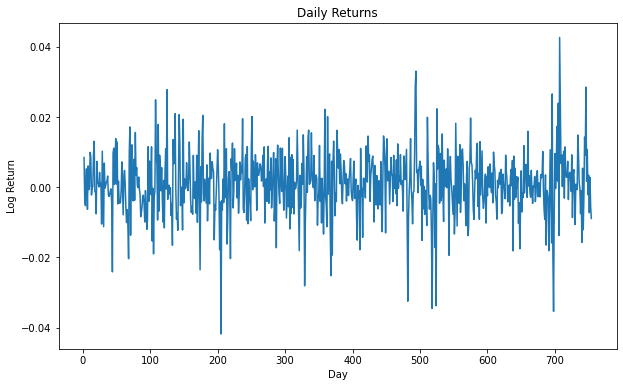

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data["log_returns"])
plt.title("Daily Returns")
plt.xlabel("Day")
plt.ylabel("Log Return")
plt.show()


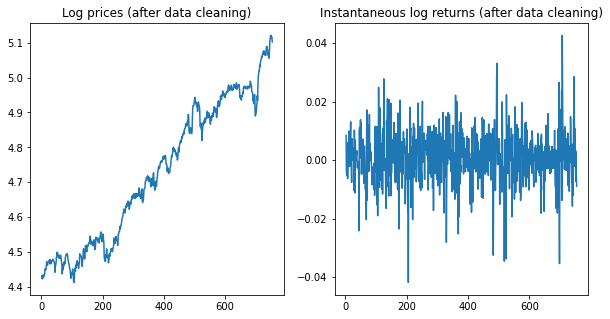

In [6]:
_, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(daily_data["logprice"])
axs[0].set_title("Log prices (after data cleaning)")

axs[1].plot(daily_data["log_returns"])
axs[1].set_title("Instantaneous log returns (after data cleaning)")
plt.savefig("logprice_returns.png")
# files.download("logprice_returns.png")

**SQUARED DAILY RETURNS**

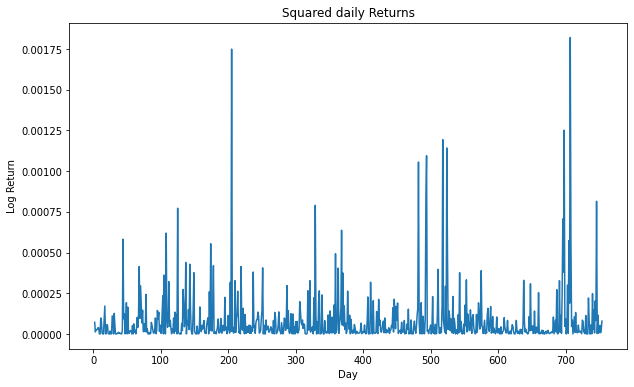

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data["squared_log_returns"])
plt.title("Squared daily Returns")
plt.xlabel("Day")
plt.ylabel("Log Return")
plt.show()

**AUTOCORRELATION PLOT**



*   If for 2 or more lags the autocorrelation is significantly different from zer0 then data is not i.i.d




<Figure size 720x432 with 0 Axes>

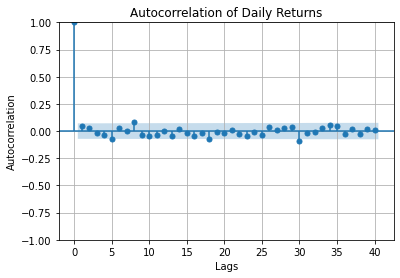

In [8]:
plt.figure(figsize=(10, 6))
plot_acf(daily_data['log_returns'].dropna(), lags=40, alpha=0.05)
plt.title("Autocorrelation of Daily Returns")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


**PARTIAL AUTOCORRELATION OF DAILY RETURNS**

C:\Users\andre\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

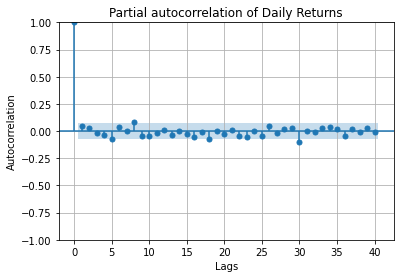

In [9]:
plt.figure(figsize=(10, 6))
plot_pacf(daily_data['log_returns'].dropna(), lags=40, alpha=0.05)
plt.title("Partial autocorrelation of Daily Returns")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()


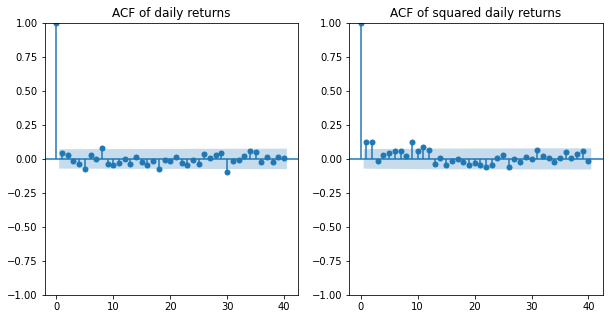

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

_, axs = plt.subplots(1,2,figsize=(10,5))

plot_acf(daily_data['log_returns'].dropna(), lags=40, alpha=0.05,ax=axs[0])
axs[0].set_title("ACF of daily returns")

plot_acf(daily_data['squared_log_returns'].dropna(), lags=40, alpha=0.05,ax=axs[1])
axs[1].set_title("ACF of squared daily returns")
plt.savefig("ACF.png")

**AUTOCORRELATION OF SQUARED RETURNS**

<Figure size 720x432 with 0 Axes>

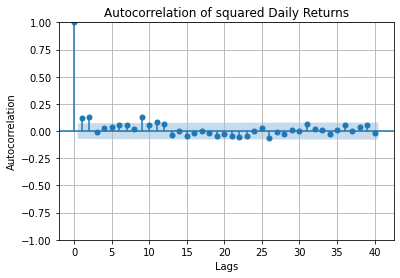

In [11]:
plt.figure(figsize=(10, 6))
plot_acf(daily_data['squared_log_returns'].dropna(), lags=40, alpha=0.05)
plt.title("Autocorrelation of squared Daily Returns")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

**LJUNG BOX FOR DAILY RETURNS**



*   The p-value is large, therefore i do not reject the null hypothesis of uncorrelatedness
*   From the correlogram I see multiple values outside of the confidence interval






In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Drop NaN values to ensure clean data
daily_returns = daily_data['log_returns'].dropna()

# Perform the Ljung-Box test on the daily returns
ljung_box_result = acorr_ljungbox(daily_returns, lags=40, return_df=True)

ljung_box_result


,lb_stat,lb_pvalue
1,1.458911,0.227103
2,2.088443,0.351966
3,2.257587,0.520695
4,3.176267,0.528773
5,7.563215,0.182007
6,8.278933,0.218372
7,8.279059,0.308631
8,13.552121,0.094212
9,14.604836,0.102378
10,16.076326,0.097468


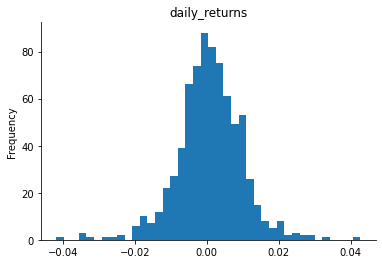

In [14]:
from matplotlib import pyplot as plt
daily_data['log_returns'].plot(kind='hist', bins=40, title='daily_returns')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig("graph.png")


In [15]:
daily_returns.describe()

count    753.000000
mean       0.000900
std        0.008930
min       -0.041827
25%       -0.004033
50%        0.000885
75%        0.006137
max        0.042674
Name: log_returns, dtype: float64

**TEST FOR NORMALITY**



In [16]:
from scipy.stats import shapiro

stat, p_value = shapiro(daily_returns)
print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: Data is not normally distributed")
else:
    print("Fail to reject null hypothesis: Data is likely normally distributed")


Shapiro-Wilk Test: Statistic=0.9720314145088196, p-value=8.15388728758748e-11
Reject null hypothesis: Data is not normally distributed


In [17]:
jb_stat, p_value, skew, kurtosis = jarque_bera(daily_returns)

print(f"Jarque-Bera test statistic: {jb_stat}")
print(f"Jarque-Bera test p-value: {p_value}")
print(f"Skewness: {skew}")
print(f"Kurtosis: {kurtosis}")

Jarque-Bera test statistic: 205.65283672182943
Jarque-Bera test p-value: 2.203199944534618e-45
Skewness: -0.2152003728150938
Kurtosis: 5.523772431284666


**FITTTING THE DATA INTO A T-DISTRIBUTION**



In [18]:
# Fit a Student's t-distribution to our returns
params = t.fit(daily_returns)

# Extract parameters(location-scale t distribution)
df, loc, scale = params
df = int(np.ceil(df))
print(f" Degrees of freedom: {df}")
print(f" Mean: {loc}")
print(f" Scale: {scale}")

 Degrees of freedom: 5
 Mean: 0.0010096219509849612
 Scale: 0.006856982490287419


In [20]:

# Calculate statistics
mean = daily_returns.mean()
std_dev = daily_returns.std()
skewness = daily_returns.skew()
kurt = daily_returns.kurtosis()

# Create the table as a DataFrame
stats_df = pd.DataFrame({
    "Statistic": ["Mean", "Standard Deviation", "Skewness", "Kurtosis"],
    "Value": [mean, std_dev, skewness, kurt]
})

stats_df

,Statistic,Value
0,Mean,0.000900
1,Standard Deviation,0.008930
2,Skewness,-0.215630
3,Kurtosis,2.548622


**VAR ESTIMATE USING NORMAL DISTRIBUTION**

VaR at 5% confidence level: -0.013787847226685853


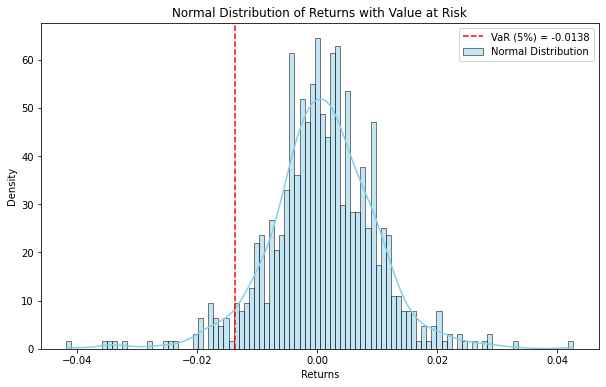

In [21]:
from scipy.stats import norm

confidence_level = 0.05

z_score = norm.ppf(confidence_level)
mean_returns = daily_returns.mean()
std_dev_returns = daily_returns.std()
var_normal= z_score * std_dev_returns + mean_returns


print(f"VaR at 5% confidence level: {var_normal}")

# Plot the histogram and KDE of returns
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, color="skyblue", stat="density", bins=100, label="Normal Distribution")

# Mark the VaR line
plt.axvline(var_normal, color='red', linestyle='--', label=f'VaR ({confidence_level*100:.0f}%) = {var_normal:.4f}')

plt.title("Normal Distribution of Returns with Value at Risk")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.show()


**VAR ESTIMATE USING T-DISTRIBUTION**



VaR at 5% confidence level: -0.01280752945748961


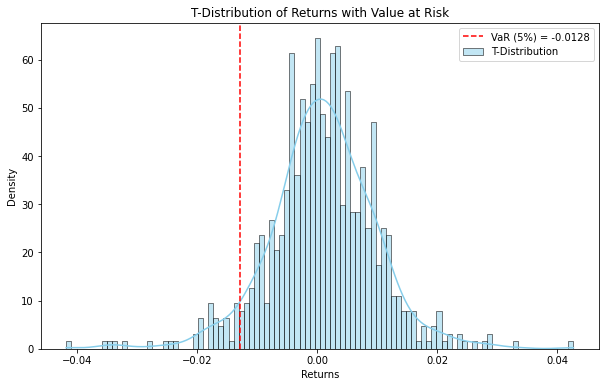

In [22]:
# Specify the confidence level
confidence_level = 0.05

# Calculate the critical value for the t-distribution
var_t_student = t.ppf(confidence_level, df, loc=loc, scale=scale)
print(f"VaR at 5% confidence level: {var_t_student}")

alpha = 0.05  # For 5% VaR

# Plot the histogram and KDE of returns
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, color="skyblue", stat="density", bins=100, label="T-Distribution")

plt.axvline(var_t_student, color='red', linestyle='--', label=f'VaR ({alpha*100:.0f}%) = {var_t_student:.4f}')

plt.title("T-Distribution of Returns with Value at Risk")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.show()

**VAR ESTIMATE USING EMPIRICAL DISTRIBUTION**

VaR at 5% confidence level: -0.013339426742829018


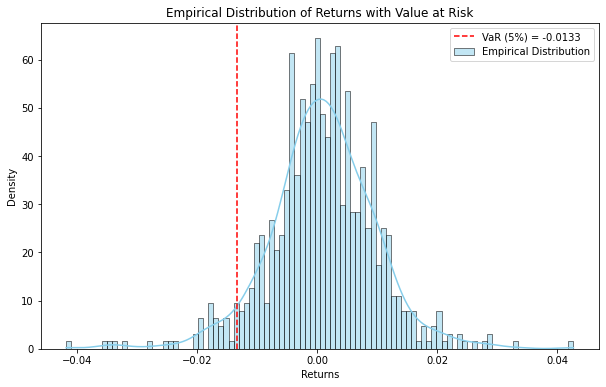

In [23]:
alpha = 0.05  # For 5% VaR
var_empirical = np.percentile(daily_returns, 100 * alpha)

print(f"VaR at 5% confidence level: {var_empirical}")

# Plot the histogram and KDE of returns
plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, kde=True, color="skyblue", stat="density", bins=100, label="Empirical Distribution")
plt.axvline(var_empirical, color='red', linestyle='--', label=f'VaR ({alpha*100:.0f}%) = {var_empirical:.4f}')
plt.title("Empirical Distribution of Returns with Value at Risk")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.show()

NameError: name 'files' is not defined

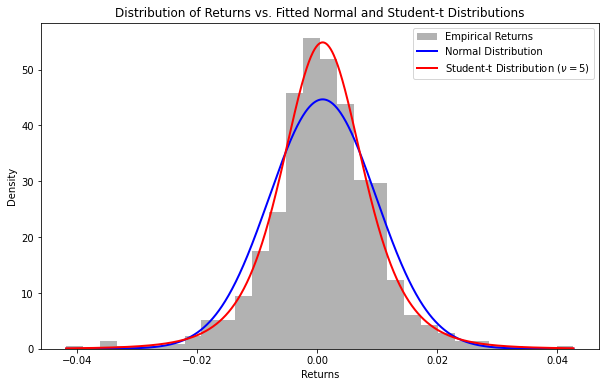

In [ ]:
x = np.linspace(min(daily_returns),max(daily_returns),1000)

plt.figure(figsize=(10, 6))
plt.hist(daily_returns, bins=30, density=True, alpha=0.6, color='gray', label='Empirical Returns')
plt.plot(x, norm.pdf(x, loc=daily_returns.mean(), scale=daily_returns.std()), 'b-', label='Normal Distribution', linewidth=2)
plt.plot(x, t.pdf(x, df, loc=daily_returns.mean(), scale=daily_returns.std() * np.sqrt((df - 2) / df)), 'r-', label=r'Student-t Distribution ($\nu=5$)', linewidth=2)
plt.title("Distribution of Returns vs. Fitted Normal and Student-t Distributions")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.savefig("distribution_fit.png")
# files.download("distribution_fit.png")
plt.show()

**MOVING AVERAGE**

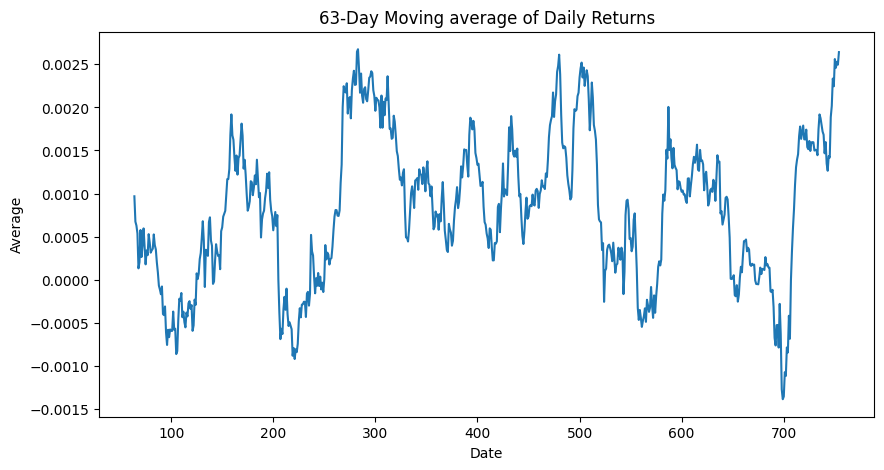

In [ ]:

window = 63  # 63-day rolling window

# Calculate rolling (moving) volatility
rolling_mean = daily_returns.rolling(window=window).mean()

plt.figure(figsize=(10, 5))
rolling_mean.plot(title="63-Day Moving average of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Average")
plt.show()

**ROLLING VOLATILITY**



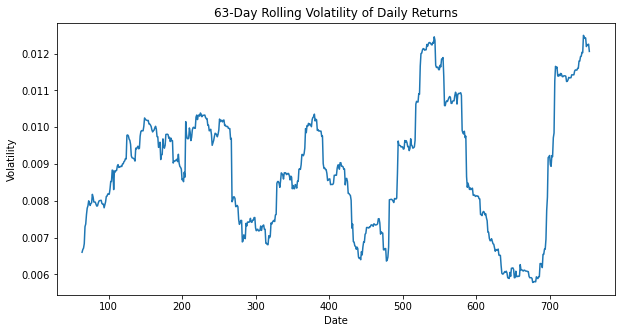

In [25]:
window = 63  # 63-day rolling window

rolling_volatility = daily_returns.rolling(window=window).std()

plt.figure(figsize=(10, 5))
rolling_volatility.plot(title="63-Day Rolling Volatility of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()



**STANDARDIZED RETURNS**


In [26]:
standardized_returns = (daily_returns - rolling_mean) / rolling_volatility

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_returns.index, standardized_returns, color='blue', label='Standardized Returns')
plt.title("Standardized Return Series")
plt.xlabel("Date")
plt.ylabel("Standardized Returns (Z_t)")
plt.legend()
plt.show()

NameError: name 'rolling_mean' is not defined

**VAR USING EMPIRICAL DISTRIBUTION OF THE FILTERED SERIES**

Moving VaR at 5% confidence level: day
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
         ...   
750   -0.017747
751   -0.017940
752   -0.017852
753   -0.017919
754   -0.017447
Name: log_returns, Length: 753, dtype: float64


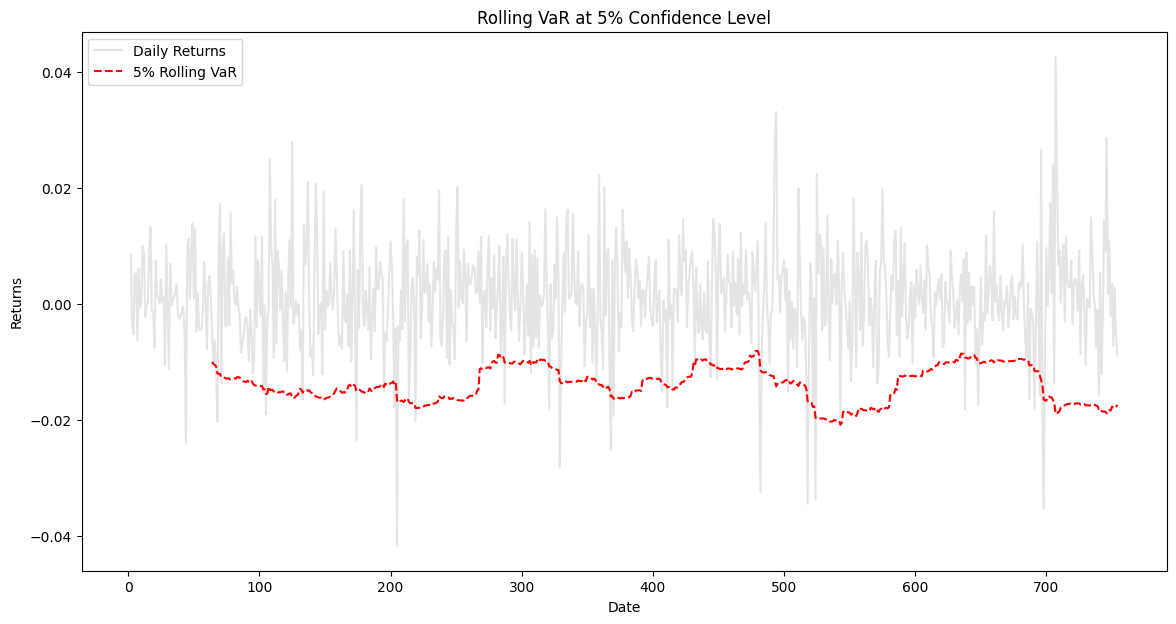

In [ ]:
window = 63
rolling_mean = daily_returns.rolling(window=window).mean()
rolling_volatility = daily_returns.rolling(window=window).std()
alpha = 0.05
standardized_returns_non_nan = standardized_returns.dropna()

var_empirical_standardized = np.percentile(standardized_returns_non_nan, 100 * alpha)
rolling_var = var_empirical_standardized * rolling_volatility + rolling_mean
print(f"Moving VaR at 5% confidence level: {rolling_var}")

plt.figure(figsize=(14, 7))
plt.plot(daily_returns.index, daily_returns, color='lightgrey', label="Daily Returns", alpha=0.6)
plt.plot(rolling_var, color='red', linestyle='--', linewidth=1.5, label=f"{int(alpha*100)}% Rolling VaR")
plt.title(f"Rolling VaR at {int(alpha*100)}% Confidence Level")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()


**COMPARISON OF DIFFERENT VAR**

Number of Exceedances (Normal VaR): 34)
Number of Exceedances (t-student VaR): 40
Number of Exceedances (Empirical VaR): 38
Expected Exceedances: 38.0
Number of Exceedances (Rolling VaR): 35


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

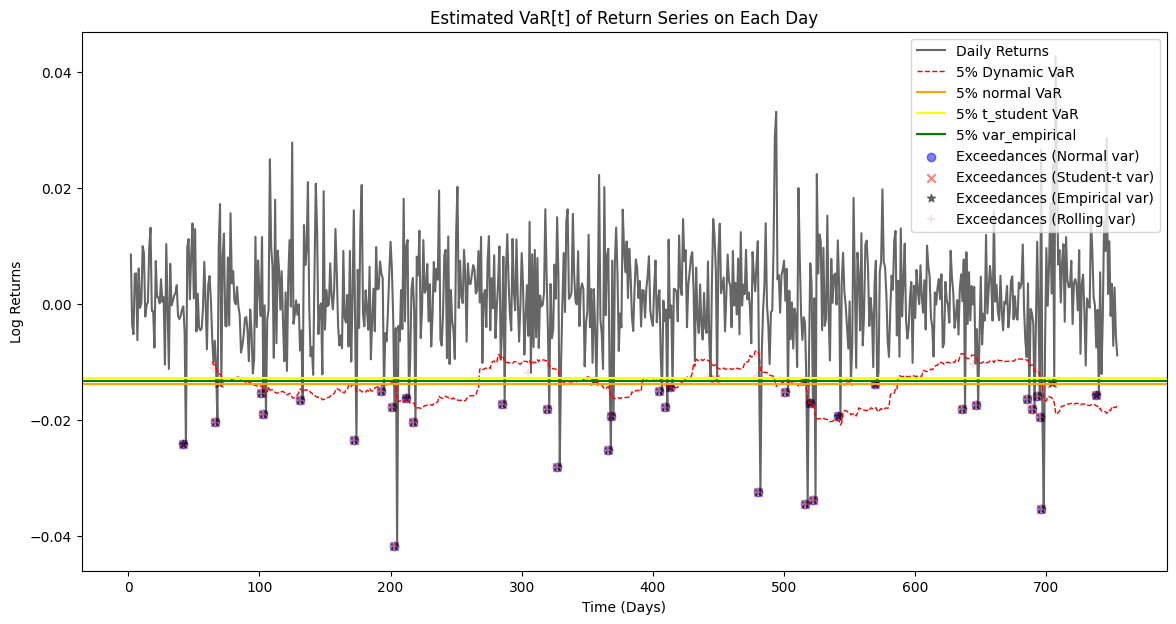

In [ ]:
confidence_level=0.95

plt.figure(figsize=(14, 7))
plt.plot(daily_returns.index, daily_returns, color='black', label="Daily Returns", alpha=0.6)
plt.plot(rolling_var.index, rolling_var, 'r--', linewidth=1, label="5% Dynamic VaR")

plt.axhline(var_normal, color='orange', linestyle='-', linewidth=1.5, label="5% normal VaR")
plt.axhline(var_t_student, color='yellow', linestyle='-', linewidth=1.5, label="5% t_student VaR")
plt.axhline(var_empirical, color='green', linestyle='-', linewidth=1.5, label="5% var_empirical")


#Number of exceedances

expected_exceedances = np.ceil((1 - confidence_level) * len(daily_returns))
exceedances_normal = np.sum(daily_returns < var_normal)
exceedances_t = np.sum(daily_returns < var_t_student)
exceedances_empirical = np.sum(daily_returns < var_empirical)
exceedances_rolling = np.sum(daily_returns < rolling_var)

#Plot graph of exceedances
plt.scatter(np.where(daily_returns < var_normal)[0], daily_returns[daily_returns < var_normal],
    color='blue', marker='o', label='Exceedances (Normal var)', alpha=0.5)
plt.scatter(np.where(daily_returns < var_t_student)[0], daily_returns[daily_returns < var_t_student],
    color='red', marker='x', label='Exceedances (Student-t var)', alpha=0.5)
plt.scatter(np.where(daily_returns < var_empirical)[0], daily_returns[daily_returns < var_empirical],
    color='black', marker='*', label='Exceedances (Empirical var)', alpha=0.5)
plt.scatter(np.where(daily_returns < rolling_var)[0], daily_returns[daily_returns < rolling_var],
    color='pink', marker='+', label='Exceedances (Rolling var)', alpha=0.5)

plt.title("Estimated VaR[t] of Return Series on Each Day")
plt.xlabel("Time (Days)")
plt.ylabel("Log Returns")
plt.legend()

print(f"Number of Exceedances (Normal VaR): {exceedances_normal})")
print(f"Number of Exceedances (t-student VaR): {exceedances_t}")
print(f"Number of Exceedances (Empirical VaR): {exceedances_empirical}")
print(f"Expected Exceedances: {expected_exceedances}")
print(f"Number of Exceedances (Rolling VaR): {exceedances_rolling}")
plt.savefig("var_comparison1.png")
plt.show()


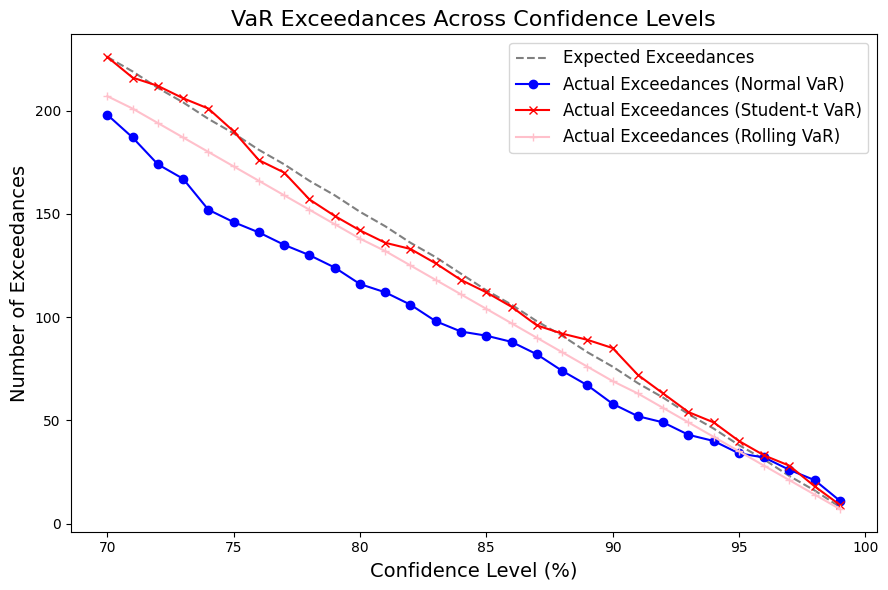

In [ ]:
# Define a range of confidence levels from 90% to 99%
confidence_levels = np.arange(0.70, 0.999, 0.01)

# Initialize lists to store exceedance counts
exceedances_normal = []
exceedances_t = []
expected_exceedances = []
exceedances_empirical = []
exceedances_rolling = []


# Calculate Exceedances Across Confidence Levels

for cl in confidence_levels:
    # Calculate quantiles
    z_score = norm.ppf(1 - cl)  # Normal quantile
    VaR_t = t.ppf(1- cl, df, loc=loc, scale=scale)
    Var_empirical=np.percentile(daily_returns, 100 * (1 - cl))
    var_empirical_standardized = np.percentile(standardized_returns_non_nan, 100 * (1 - cl))
    rolling_var= var_empirical_standardized * rolling_volatility + rolling_mean
    var_normal= mean_returns + z_score * std_dev_returns

    # Count exceedances
    exceed_normal = np.sum(daily_returns < var_normal)
    exceed_t = np.sum(daily_returns < VaR_t)
    exceed_empirical = np.sum(daily_returns < Var_empirical)
    exceed_rolling = np.sum(daily_returns < rolling_var)

    # Expected exceedances
    expected_exceed = np.ceil((1 - cl) * len(daily_returns))

    # Append to lists
    exceedances_normal.append(exceed_normal)
    exceedances_t.append(exceed_t)
    exceedances_empirical.append(exceed_empirical)
    exceedances_rolling.append(exceed_rolling)
    expected_exceedances.append(expected_exceed)

# Convert lists to NumPy arrays for easier handling
exceedances_normal = np.array(exceedances_normal)
exceedances_t = np.array(exceedances_t)
exceedances_empirical = np.array(exceedances_empirical)
exceedances_rolling = np.array(exceedances_rolling)
expected_exceedances = np.array(expected_exceedances)


plt.figure(figsize=(9, 6))

# Plot expected exceedances
plt.plot(confidence_levels * 100, expected_exceedances, label='Expected Exceedances', color='grey', linestyle='--')

# Plot actual exceedances for Normal VaR
plt.plot(confidence_levels * 100, exceedances_normal, label='Actual Exceedances (Normal VaR)', color='blue', marker='o')

# Plot actual exceedances for Student-t VaR
plt.plot(confidence_levels * 100, exceedances_t, label='Actual Exceedances (Student-t VaR)', color='red', marker='x')


# # Plot actual exceedances for rolling VaR
plt.plot(confidence_levels * 100, exceedances_rolling, label='Actual Exceedances (Rolling VaR)', color='pink', marker='+')

plt.xlabel('Confidence Level (%)', fontsize=14)
plt.ylabel('Number of Exceedances', fontsize=14)
plt.title('VaR Exceedances Across Confidence Levels', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


summary_df = pd.DataFrame({
    'Confidence Level (%)': confidence_levels * 100,
    'Expected Exceedances': expected_exceedances.astype(int),
    'Actual Exceedances (Normal)': exceedances_normal,
    'Actual Exceedances (Student-t)': exceedances_t
})

